In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
archivo = pd.read_csv('GLT_filtrado.csv')
len(archivo)

219575

De solo ver el archivo se puede notar que hay datos que faltan, que hay unos que se ven normales per otros que tienen demasiados decimales

In [ ]:
archivo.head()

,Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


Notamos que tenemos fechas, por lo que es mejor manejarlas como fechas y para heso hay una función de pandas que hace esa transformación de string a fechas.

In [ ]:
archivo['Date'] = pd.to_datetime(archivo['Date'])

Con la función de pandas .info() podemos ver las características de los datos que hay en cada columna de nuestro archivo y notamos que las columnas con datos faltantes son AverageTemperature y AverageTemperatureUncertainty ya que son las unicas que no tienen todos los 219575 datos no nulos, también notamos que la columna Date ya tiene formato de fecha, AverageTemperature y AverageTemperatureUncertainty tienen valores flotantes y las demás columnas tienen strings.

In [ ]:
print(archivo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219575 entries, 0 to 219574
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Date                           219575 non-null  datetime64[ns]
 1   AverageTemperature             191994 non-null  float64       
 2   AverageTemperatureUncertainty  191994 non-null  float64       
 3   City                           219575 non-null  object        
 4   Country                        219575 non-null  object        
 5   Latitude                       219575 non-null  object        
 6   Longitude                      219575 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 11.7+ MB
None


In [ ]:
ciudades = archivo["City"].unique() 
print("El número de ciudades únicas es:", len(ciudades)) 
print("La lista de ciudades que se encuentran en el archivo:", ciudades)

El número de ciudades únicas es: 100
La lista de ciudades que se encuentran en el archivo: ['Abidjan' 'Addis Abeba' 'Ahmadabad' 'Aleppo' 'Alexandria' 'Ankara'
 'Baghdad' 'Bangalore' 'Bangkok' 'Belo Horizonte' 'Berlin' 'Bogotá'
 'Bombay' 'Brasília' 'Cairo' 'Calcutta' 'Cali' 'Cape Town' 'Casablanca'
 'Changchun' 'Chengdu' 'Chicago' 'Chongqing' 'Dakar' 'Dalian'
 'Dar Es Salaam' 'Delhi' 'Dhaka' 'Durban' 'Faisalabad' 'Fortaleza' 'Gizeh'
 'Guangzhou' 'Harare' 'Harbin' 'Ho Chi Minh City' 'Hyderabad' 'Ibadan'
 'Istanbul' 'Izmir' 'Jaipur' 'Jakarta' 'Jiddah' 'Jinan' 'Kabul' 'Kano'
 'Kanpur' 'Karachi' 'Kiev' 'Kinshasa' 'Lagos' 'Lahore' 'Lakhnau' 'Lima'
 'London' 'Los Angeles' 'Luanda' 'Madras' 'Madrid' 'Manila' 'Mashhad'
 'Melbourne' 'Mexico' 'Mogadishu' 'Montreal' 'Moscow' 'Nagoya' 'Nagpur'
 'Nairobi' 'Nanjing' 'New Delhi' 'New York' 'Paris' 'Peking' 'Pune'
 'Rangoon' 'Rio De Janeiro' 'Riyadh' 'Rome' 'Saint Petersburg' 'Salvador'
 'Santiago' 'Santo Domingo' 'Seoul' 'Shanghai' 'Shenyang' 'Singapo

In [ ]:
datos_faltantes = archivo['AverageTemperature'].isna().sum() 
print('El número de valores faltantes en "AverageTemperature" es:', datos_faltantes)

El número de valores faltantes en "AverageTemperature" es: 27581


In [ ]:
promedio_datos_faltantes = (datos_faltantes / len(archivo['AverageTemperature']))*100
print(f'Los datos faltantes en la columna de "AverageTemperature" representan un {promedio_datos_faltantes}% del total')

Los datos faltantes en la columna de "AverageTemperature" representan un 12.561083912102927% del total


In [ ]:
datos_por_ciudad = dict(tuple(archivo.groupby('City')))
# Ejemplo: Mostrar las primeras filas de la ciudad "Rome"
print(datos_por_ciudad["Rome"].head())

             Date  AverageTemperature  AverageTemperatureUncertainty  City  \
171503 1817-01-01               3.505                          5.641  Rome   
171504 1817-02-01               5.107                          2.598  Rome   
171505 1817-03-01               6.799                          2.982  Rome   
171506 1817-04-01               6.868                          2.458  Rome   
171507 1817-05-01              13.901                          2.773  Rome   

       Country Latitude Longitude  
171503   Italy   42.59N    13.09E  
171504   Italy   42.59N    13.09E  
171505   Italy   42.59N    13.09E  
171506   Italy   42.59N    13.09E  
171507   Italy   42.59N    13.09E  


In [ ]:
promedio_datos_faltantes = (datos_faltantes / len(archivo['AverageTemperature']))*100
print(f'Los datos faltantes en la columna de "AverageTemperature" representan un {promedio_datos_faltantes}% del total')

Los datos faltantes en la columna de "AverageTemperature" representan un 12.561083912102927% del total


In [ ]:
def llenar_faltantes(lista):
    # Ordenar el grupo por fecha
    lista = lista.sort_values('Date').reset_index(drop=True)
    temps = lista['AverageTemperature'].tolist()
    for i in range(len(temps)):
        if pd.isna(temps[i]):
            # Valor anterior (si no hay, usar 0)
            previo = 0
            for j in range(i-1, -1, -1):
                if not pd.isna(temps[j]):
                    previo = temps[j]
                    break
            # Valor siguiente (si no hay, usar 0)
            next_val = 0
            for j in range(i+1, len(temps)):
                if not pd.isna(temps[j]):
                    siguiente = temps[j]
                    break
            # Imputar con la media aritmética de los dos vecinos
            temps[i] = (previo + siguiente) / 2
    lista['AverageTemperature'] = temps
    return lista

# Aplicar la función para cada ciudad
df = archivo.groupby('City').apply(llenar_faltantes).reset_index(drop=True)

# Verificar nuevamente la cantidad de valores faltantes
print("Valores faltantes después de la imputación:", df['AverageTemperature'].isna().sum())


Valores faltantes después de la imputación: 0


C:\Users\genar\AppData\Local\Temp\ipykernel_13304\1267473768.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = archivo.groupby('City').apply(llenar_faltantes).reset_index(drop=True)


In [ ]:
df.to_csv('GLT_filtrado_editado.csv', index=False) 

Se buscará dar una respuesta al cambio en temperaturas con los datos

In [ ]:
ciudades = ["Cairo", "Moscow", "Peking", "Rome", "Mexico"]
for ciudad in ciudades:
    subset = df[df['City'] == ciudad]
    temp_max = subset['AverageTemperature'].max()
    temp_min = subset['AverageTemperature'].min()
    print(f"{ciudad}: Temp. máxima = {temp_max}, Temp. mínima = {temp_min}")


Cairo: Temp. máxima = 30.767, Temp. mínima = 10.0795
Moscow: Temp. máxima = 24.58, Temp. mínima = -19.376
Peking: Temp. máxima = 28.936, Temp. mínima = -8.579
Rome: Temp. máxima = 25.951, Temp. mínima = -1.4410000000000005
Mexico: Temp. máxima = 21.0, Temp. mínima = 9.127


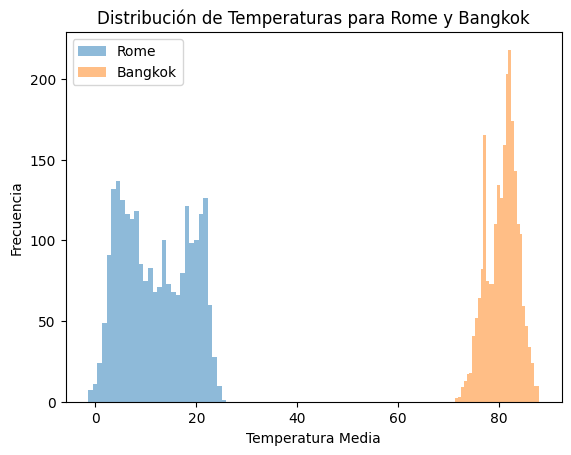

In [ ]:
ciudades_grafico = ["Rome", "Bangkok"]
for ciudad in ciudades_grafico:
    subset = df[df['City'] == ciudad]
    plt.hist(subset['AverageTemperature'], bins=30, alpha=0.5, label=ciudad)

plt.xlabel("Temperatura Media")
plt.ylabel("Frecuencia")
plt.title("Distribución de Temperaturas para Rome y Bangkok")
plt.legend()
plt.show()

Podemos notar que hay una diferencia ridícula en temperatura y a menos que los habitantes de Bangkok vivan casi a una temperatura de ebullición o que todos los datos medidos desde siempre estén incorrectos la interpretación que se puede dar es que las escalas no son las mismas, dado que al investigar las temperaturas en Bangkok muestran que en llos últimos años su temperatura promedio es de aproximadamente 27°C lo cual resulta ser 80.6°F lo que concuerda con la temperatura mostrada en el gráfico.

In [ ]:
datos_por_ciudad = dict(tuple(df.groupby('City')))

# Ejemplo: Mostrar las primeras filas de la ciudad "Rome"
print(datos_por_ciudad["Rome"].head())

             Date  AverageTemperature  AverageTemperatureUncertainty  City  \
171503 1817-01-01               3.505                          5.641  Rome   
171504 1817-02-01               5.107                          2.598  Rome   
171505 1817-03-01               6.799                          2.982  Rome   
171506 1817-04-01               6.868                          2.458  Rome   
171507 1817-05-01              13.901                          2.773  Rome   

       Country Latitude Longitude  
171503   Italy   42.59N    13.09E  
171504   Italy   42.59N    13.09E  
171505   Italy   42.59N    13.09E  
171506   Italy   42.59N    13.09E  
171507   Italy   42.59N    13.09E  


Ahora calculamos el promedio anual de la temperatura para cada ciudad

In [ ]:
df['Año'] = df['Date'].dt.year
promedio_anual_por_ciudad = df.groupby(['City', 'Año'])['AverageTemperature'].mean().reset_index()

Con este promedio anual vamos a filtrar si hay valores demasiado altos, aquí se eligió 40°C como valor umbral para decidir cuales son unas anomalías.

In [ ]:
promedio_over_40 = promedio_anual_por_ciudad[promedio_anual_por_ciudad['AverageTemperature'] > 45]
max_temp_por_ciudad = promedio_over_40.groupby('City')['AverageTemperature'].max().reset_index()
print("Ciudades con promedio anual de temperatura mayor a 40°C y su valor máximo:")
print(max_temp_por_ciudad)

Ciudades con promedio anual de temperatura mayor a 40°C y su valor máximo:
      City  AverageTemperature
0  Bangkok            83.36645


Como podemos observar de la línea anterior solo Bangkok tiene esta anomalía, por lo que creamos una función para pasar de grados fahrenheit a celsius y se lo aplicamos a esa columna.

In [ ]:
def F_a_C(valor):
    return (valor - 32) / (1.8)

# Aplicar la transformación únicamente para la ciudad de Bangkok
df.loc[df['City'] == 'Bangkok', 'AverageTemperature'] = df.loc[df['City'] == 'Bangkok', 'AverageTemperature'].apply(F_a_C)

print(df[df['City'] == 'Bangkok'][['City', 'AverageTemperature']].head())


          City  AverageTemperature
18012  Bangkok              23.990
18013  Bangkok              26.786
18014  Bangkok              27.898
18015  Bangkok              29.126
18016  Bangkok              27.386


Ahora vemos que ya tienen más sentido los valores de temperatura, por lo que al hacer la misma grafica anterior tenemos que cambia.

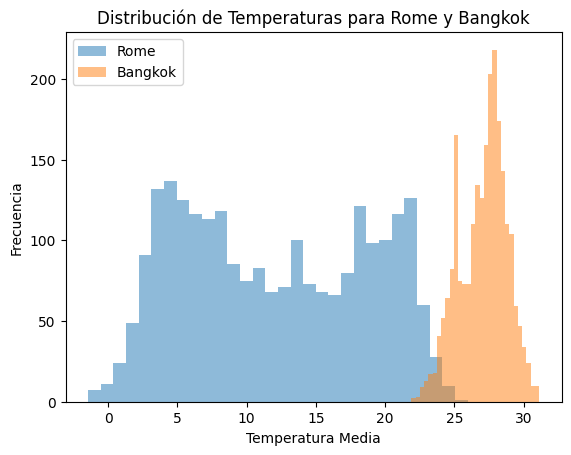

In [ ]:
ciudades_grafico = ["Rome", "Bangkok"]
for ciudad in ciudades_grafico:
    subset = df[df['City'] == ciudad]
    plt.hist(subset['AverageTemperature'], bins=30, alpha=0.5, label=ciudad)

plt.xlabel("Temperatura Media")
plt.ylabel("Frecuencia")
plt.title("Distribución de Temperaturas para Rome y Bangkok")
plt.legend()
plt.show()

In [ ]:
ciudades = ["London", "New York", "Bangkok", "Tokyo", "Paris", "Lima"]
for i in ciudades:
    ciudad = df[df['City'] == i]
    promedio_anual = ciudad.groupby('Año')['AverageTemperature'].mean()
    print(f"Temperatura media anual para {i}:\n", promedio_anual)

Temperatura media anual para London:
 Año
1817     8.948417
1818     9.845750
1819     9.625917
1820     8.503250
1821     9.628208
          ...    
2008    10.559333
2009    10.367625
2010     8.940958
2011    11.193583
2012     9.789000
Name: AverageTemperature, Length: 196, dtype: float64
Temperatura media anual para New York:
 Año
1817     7.695792
1818     8.522792
1819     9.258417
1820     8.984917
1821     8.756833
          ...    
2008    11.009250
2009    10.061417
2010    12.326854
2011    11.370708
2012    12.215875
Name: AverageTemperature, Length: 196, dtype: float64
Temperatura media anual para Bangkok:
 Año
1817    25.896917
1818    26.510333
1819    25.891458
1820    26.208125
1821    26.809333
          ...    
2008    27.257042
2009    27.663417
2010    28.536917
2011    27.257396
2012    28.491542
Name: AverageTemperature, Length: 196, dtype: float64
Temperatura media anual para Tokyo:
 Año
1845    12.157708
1846    12.404500
1847    12.321375
1848    12.196542
18

Empezamos graficando toda la linea de tiempo para todas las ciudades.

1.- Definimos el promedio para todos nuestros datos.

2.- Graficamos la serie temporal para cada ciudad.



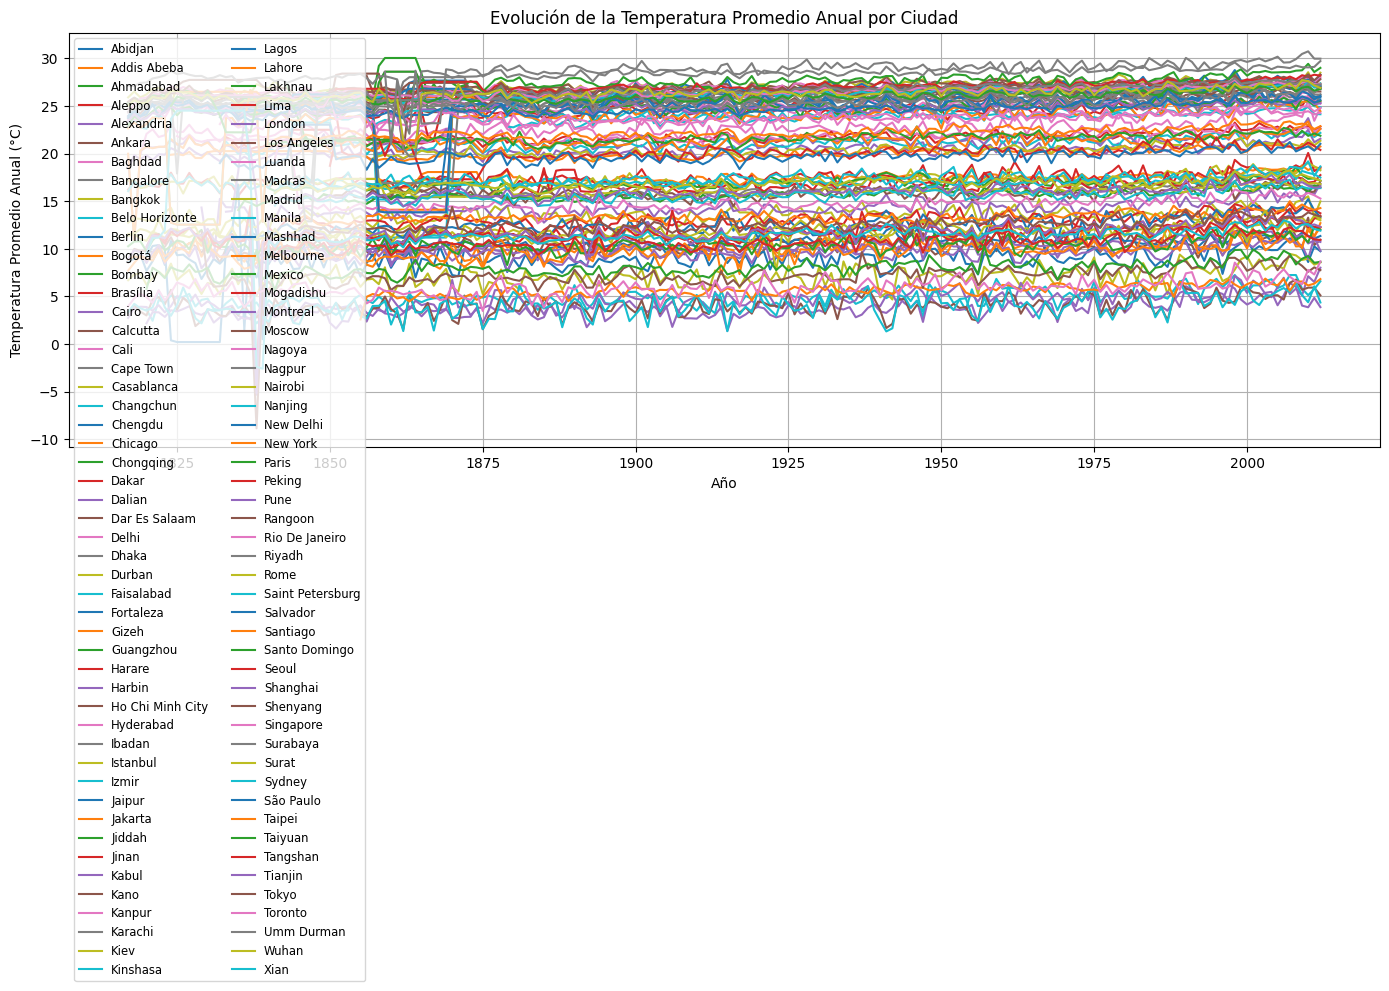

In [ ]:
# 1.-
promedio_anual = df.groupby(['City', 'Año'])['AverageTemperature'].mean().reset_index()

plt.figure(figsize=(14, 8))

# 2.-
for ciudad in promedio_anual['City'].unique():
    datos_ciudad = promedio_anual[promedio_anual['City'] == ciudad]
    plt.plot(datos_ciudad['Año'], datos_ciudad['AverageTemperature'], label=ciudad)

plt.xlabel("Año")
plt.ylabel("Temperatura Promedio Anual (°C)")
plt.title("Evolución de la Temperatura Promedio Anual por Ciudad")
plt.legend(loc='best', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


Como no se puede apreciar los datos definimos una función que nos devuelva una serie que nos de visualización de los cambios entre ciudades entre el primer año de datos y el último.

In [ ]:
def calcular_cambio(grupo):
    grupo = grupo.sort_values('Año')
    cambio = grupo['AverageTemperature'].iloc[-1] - grupo['AverageTemperature'].iloc[0]
    return pd.Series({'Cambio': cambio})

In [ ]:
cambio_por_ciudad = promedio_anual.groupby('City').apply(calcular_cambio).reset_index()

cambio_por_ciudad['AbsCambio'] = cambio_por_ciudad['Cambio'].abs()

top10 = cambio_por_ciudad.sort_values('AbsCambio', ascending=False).head(10)

print("Top 10 de ciudades con mayor cambio en la temperatura promedio anual:")
print(top10[['City', 'Cambio']])


Top 10 de ciudades con mayor cambio en la temperatura promedio anual:
         City    Cambio
64   Montreal  5.279708
6     Baghdad  4.903604
96    Toronto  4.705167
71   New York  4.520083
81   Santiago  4.244917
66     Nagoya -4.181062
85   Shenyang -4.048875
21    Chicago  3.838333
24     Dalian -3.615333
36  Hyderabad  3.591625


C:\Users\genar\AppData\Local\Temp\ipykernel_13304\587708426.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cambio_por_ciudad = promedio_anual.groupby('City').apply(calcular_cambio).reset_index()


Separamos los datos en periodos en los que acontecieron la primera, segunda y tercera revolución industrial y se aplica la función que ya hicimos.

In [ ]:
df_1era_rev = df[(df['Año'] >= 1817) & (df['Año'] <= 1870)]
promedio_anual_1era_rev = df_1era_rev.groupby(['City', 'Año'])['AverageTemperature'].mean().reset_index()

cambio_por_ciudad_1era_rev = promedio_anual_1era_rev.groupby('City').apply(calcular_cambio).reset_index()

cambio_por_ciudad_1era_rev['AbsCambio'] = cambio_por_ciudad_1era_rev['Cambio'].abs()

top5_1era_rev = cambio_por_ciudad_1era_rev.sort_values('AbsCambio', ascending=False).head(5)

print("Top 5 de ciudades en la primera revolucion industrial (1817-1870) con mayor cambio en la temperatura promedio anual:")
print(top5_1era_rev[['City', 'Cambio']])


Top 5 de ciudades en la primera revolucion industrial (1817-1870) con mayor cambio en la temperatura promedio anual:
        City    Cambio
47   Karachi -8.140500
65    Nagoya -5.001978
84  Shenyang -4.792792
24    Dalian -4.737375
63  Montreal  3.990021


C:\Users\genar\AppData\Local\Temp\ipykernel_13304\3555136282.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cambio_por_ciudad_1era_rev = promedio_anual_1era_rev.groupby('City').apply(calcular_cambio).reset_index()


In [ ]:
df_2da_rev = df[(df['Año'] >= 1870) & (df['Año'] <= 1969)]
promedio_anual_2da_rev = df_2da_rev.groupby(['City', 'Año'])['AverageTemperature'].mean().reset_index()

cambio_por_ciudad_2da_rev = promedio_anual_2da_rev.groupby('City').apply(calcular_cambio).reset_index()

cambio_por_ciudad_2da_rev['AbsCambio'] = cambio_por_ciudad_2da_rev['Cambio'].abs()

top5_2da_rev = cambio_por_ciudad_2da_rev.sort_values('AbsCambio', ascending=False).head(5)

print("Top 5 de ciudades en la segunda revolucion industrial (1870-1969) con mayor cambio en la temperatura promedio anual:")
print(top5_2da_rev[['City', 'Cambio']])


Top 5 de ciudades en la segunda revolucion industrial (1870-1969) con mayor cambio en la temperatura promedio anual:
             City    Cambio
47        Karachi  9.679125
33         Harare  2.973458
53           Lima  1.799358
95          Tokyo -1.751375
25  Dar Es Salaam  1.573208


C:\Users\genar\AppData\Local\Temp\ipykernel_13304\1140426094.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cambio_por_ciudad_2da_rev = promedio_anual_2da_rev.groupby('City').apply(calcular_cambio).reset_index()


In [ ]:
df_3ra_rev = df[(df['Año'] >= 1969) & (df['Año'] <= 2000)]
promedio_anual_3ra_rev = df_3ra_rev.groupby(['City', 'Año'])['AverageTemperature'].mean().reset_index()

cambio_por_ciudad_3ra_rev = promedio_anual_3ra_rev.groupby('City').apply(calcular_cambio).reset_index()

cambio_por_ciudad_3ra_rev['AbsCambio'] = cambio_por_ciudad_3ra_rev['Cambio'].abs()

top5_3ra_rev = cambio_por_ciudad_3ra_rev.sort_values('AbsCambio', ascending=False).head(5)

print("Top 5 de ciudades en la tercera revolucion industrial (1969-2000) con mayor cambio en la temperatura promedio anual:")
print(top5_3ra_rev[['City', 'Cambio']])

Top 5 de ciudades en la tercera revolucion industrial (1969-2000) con mayor cambio en la temperatura promedio anual:
                City    Cambio
94           Tianjin  3.470521
79  Saint Petersburg  3.381292
48              Kiev  3.334167
65            Moscow  3.276208
60           Mashhad  3.146417


C:\Users\genar\AppData\Local\Temp\ipykernel_13304\1615582562.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cambio_por_ciudad_3ra_rev = promedio_anual_3ra_rev.groupby('City').apply(calcular_cambio).reset_index()
